In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import pingouin as pg
import seaborn as sns

In [3]:
df = pd.read_csv('5_task_1.csv')
df.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


### первая задача: нужно проверить, какой формат фотографий блюд является наилучшим, т.е. в какой из групп в среднем покупали больше всего. Всего пользователям показывались три варианта:

1. Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.

In [6]:
a = df.loc[df.group == 'A']
b = df.loc[df.group == 'B']
c = df.loc[df.group == 'C']
stats.levene(a.events, b.events, c.events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [7]:
pg.homoscedasticity(data=df, dv='events', group='group')

,W,pval,equal_var
levene,2.26226,0.104133,True


2. Также убедитесь, что данные распределены нормально - тем же способом, что и в прошлом уроке.

In [9]:
print(stats.normaltest(a.events))
print(stats.normaltest(b.events))
print(stats.normaltest(c.events))

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)
NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)
NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)


In [10]:
pg.normality(data=df, dv='events', group='group', method='normaltest')

,W,pval,normal
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


In [11]:
print(stats.shapiro(a.events))
print(stats.shapiro(b.events))
print(stats.shapiro(c.events))#Шапиро очень чувствителен к большим размерам выборок

ShapiroResult(statistic=0.9989418387413025, pvalue=4.318870651331963e-06)
ShapiroResult(statistic=0.9990161061286926, pvalue=1.0504894817131571e-05)
ShapiroResult(statistic=0.9989210963249207, pvalue=3.3885160064528463e-06)


/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


3. сравните  результат с qq-графиками. Какой вывод можно сделать по совокупности этих методов?

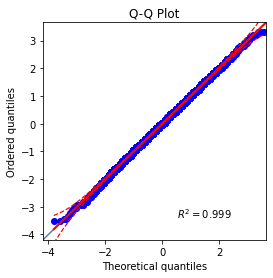

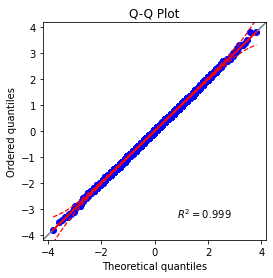

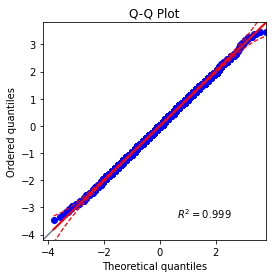

In [12]:
pg.qqplot(a.events, dist='norm', figsize=(4, 4))
pg.qqplot(b.events, dist='norm', figsize=(4, 4))
pg.qqplot(c.events, dist='norm', figsize=(4, 4))

4. Для сравнения средних я использую ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ Значение статистики равно (окр. до целого) ВЫБРАТЬ, a р-уровень значимости составил 

In [14]:
stats.f_oneway(a.events, b.events, c.events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [15]:
pg.anova(data=df, dv="events", between="group")


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


5. Теперь используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 

In [16]:
pg.pairwise_tukey(data=df, dv="events", between="group")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


In [17]:
pg.pairwise_gameshowell(data=df, dv="events", between="group")# если разная дисперсия

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140920,-57.011134,19987.258491,0.001,-0.806229
1,A,C,29.5796,27.4703,2.1093,0.141696,14.886135,19995.116233,0.001,0.210514
2,B,C,37.6136,27.4703,10.1433,0.140062,72.420220,19995.502469,0.001,1.024138


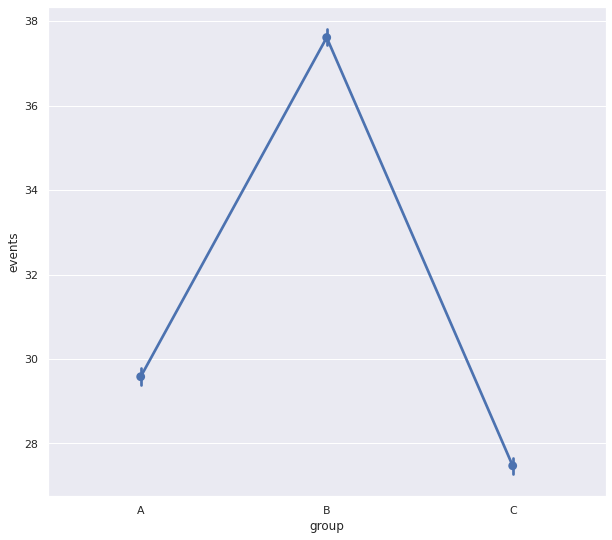

In [18]:
sns.set(rc={'figure.figsize':(10, 9)})
sns.pointplot(x = 'group', y = 'events', data = df)#, capsize = .2)

#### Так какие картинки в итоге будем использовать?
#### КВАДРАТНЫЕ!

Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.

In [19]:
df2 = pd.read_csv('5_task_2 (1).csv')
df2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


6. Посмотрим на данные. Для начала визуализируйте распределение events для контрольной и тестовой групп. 

Соотнесите графики распределения и экспериментальные группы:

In [29]:
sns.set(rc={'figure.figsize':(7, 5)})

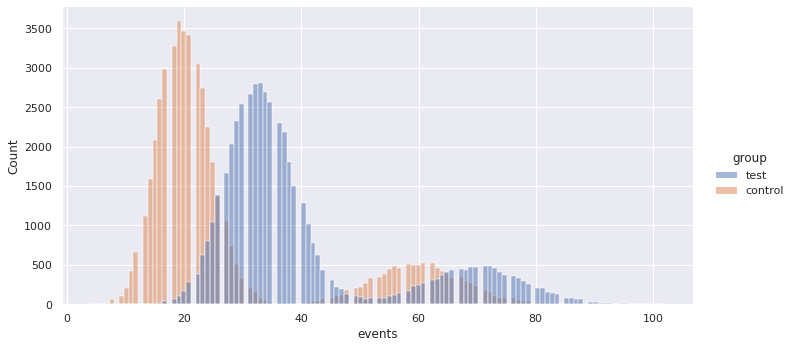

In [25]:
sns.displot(x=df2.events, hue=df2.group, height=5, aspect=2)

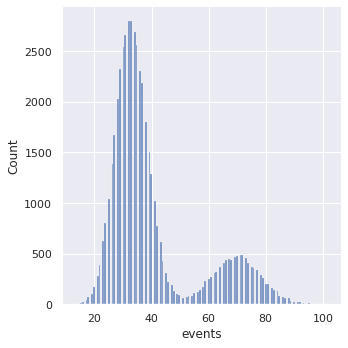

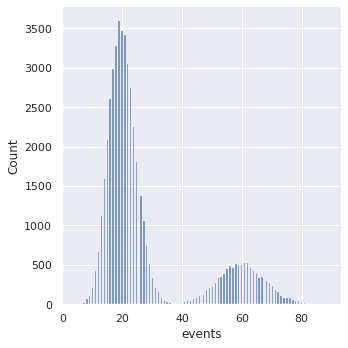

In [26]:
sns.displot(x=df2[df2.group == 'test'].events)
sns.displot(x=df2[df2.group == 'control'].events)

7. Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

В качестве ответа укажите стандартное отклонение для пользователей из сегмента high и контрольной группы,
с точностью до 2 знаков после точки.

In [42]:
df2.groupby(['group', 'segment']).events.describe()


count       mean       std   min   25%   50%   75%    max
group   segment                                                             
control high     10000.0  59.970800  7.805347  31.0  55.0  60.0  65.0   89.0
        low      40000.0  20.031575  4.473576   4.0  17.0  20.0  23.0   41.0
test    high     10000.0  69.938500  8.403974  40.0  64.0  70.0  76.0  102.0
        low      40000.0  33.025925  5.720845  13.0  29.0  33.0  37.0   59.0

8. Проведите тест (через anova_lm либо pg.anova), а затем используйте критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

В данном случае для последующих сравнений между группами можно проделать следующую операцию: соединить колонки group и segment в combination, чтобы потом передать в аргумент groups в MultiComparison либо pairwise_tukey:

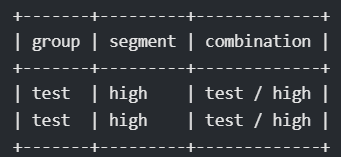

In [27]:
pg.anova(data=df2, dv='events', between=['group', 'segment'])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [28]:
df2['combination'] = df2.group + ' \ ' + df2.segment
df2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high


In [30]:
pg.pairwise_tukey(data=df2, dv="events", between='combination')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control \ high,control \ low,59.970800,20.031575,39.939225,0.065432,610.391461,0.001,6.824282
1,control \ high,test \ high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.001,-1.703109
2,control \ high,test \ low,59.970800,33.025925,26.944875,0.065432,411.798717,0.001,4.603981
3,control \ low,test \ high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.001,-8.527429
4,control \ low,test \ low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.001,-2.220314
5,test \ high,test \ low,69.938500,33.025925,36.912575,0.065432,564.135148,0.001,6.307128


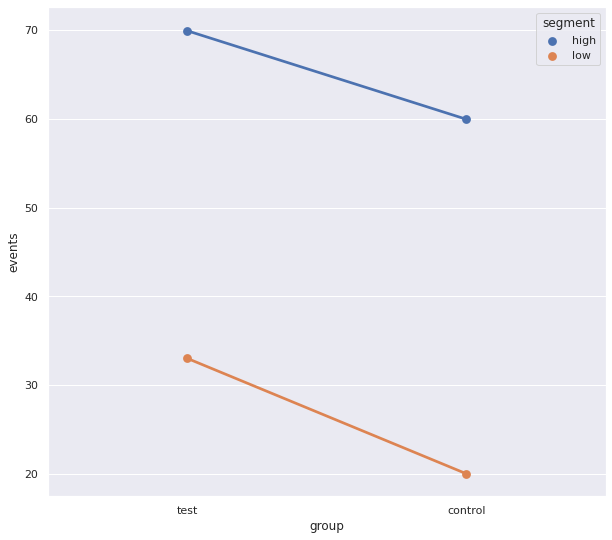

In [31]:
sns.set(rc={'figure.figsize':(10, 9)})
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = df2)#, capsize = .2)